# Bank Loan Data Exploratory Analysis

# 1. Bank Marketting Dataset

## Dataset: 
The dataset whichis being explored in this notebook is a classic bank marketing dataset that gives information about a marketing campaign related to direct marketing campaigns (phone calls) of a Portuguese banking institution.  
Related information about the dataset can be found here: https://archive.ics.uci.edu/dataset/222/bank+marketing


### Dataset Attributes:
#### Client Information attributes

- age (numeric)
- job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
- marital : marital status (categorical: "married","divorced","single"; note: "divorced" meansdivorced or widowed)
- education (categorical: "unknown","secondary","primary","tertiary")
- default: has credit in default? (binary: "yes","no")
- balance: average yearly balance, in euros (numeric)
- housing: has housing loan? (binary: "yes","no")
- loan: has personal loan? (binary: "yes","no")


#### Information about current campaign contacts 

- contact: contact communication type (categorical: "unknown","telephone","cellular")
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- duration: last contact duration, in seconds (numeric)
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

#### Other attributes

- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical:"unknown","other","failure","success")

#### Output / Target
- deposit: has the client subscribed a term deposit? (binary: 'yes','no')




## Purpose of data analysis:
The aim of this work is to analyze the campaign marketing results to look for future strategies in order to improve the marketing results and increase the client subscribtion= to a term deposit (variable "deposit"). Campaign and data set should be analyzed to investigate proper methods and techniques of motivating more clients to deposit their money.Bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing effort on such clients.

## Term "deposit" definition:
With term deposite, customers deposit an amount of money for an agreed length of time, the term. That means they can't access the money until the term is over. In return, they will get a guaranteed amount of interest rate for the time they depositd their money. It has benefits for both banks and customers. Term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. 

# 2. Data Preparation
## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

## Loading Data

In [2]:
df = pd.read_csv('bank.xls')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## General Overview of Data Set

In [4]:
df.info()
# There is no Null values in this dataset
# We have a dataset of 11162 rows with 17 features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## Checking out the statistical parameters

In [138]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


- Age : between 18 & 95
- Balance : between -6847 & 81204
- day : last contact day of the month is between 1 & 31
- duration : last contact duration is between 2 & 3881
- campaign : number of contacts performed during this campaign for different customers is between 1 & 63
- pdays : number of days that passed by after the client was last contacted from a previouscampaign is between -1 & 854
- previous : number of contacts performed before this campaign and for this client is between 0 & 58

## Categorical attributes value_count 

In [8]:
print(df.job.value_counts(),sep = '\n')
print("*"*35)
print(df.marital.value_counts(),sep = '\n')
print("*"*35)
print(df.education.value_counts(),sep = '\n')
print("*"*35)
print(df.default.value_counts(),sep = '\n')
print("*"*35)
print(df.housing.value_counts(),sep = '\n')
print("*"*35)
print(df.loan.value_counts(),sep = '\n')
print("*"*35)
print(df.contact.value_counts(),sep = '\n')
print("*"*35)
print(df.month.value_counts(),sep = '\n')
print("*"*35)
print("Previous campaign outcome:",df.poutcome.value_counts(),sep = '\n')
print("*"*35)
print("Outcome of the current campaign/customer's subscription to bank deposit:",df.deposit.value_counts(),sep = '\n')
print("*"*35)

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
***********************************
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64
***********************************
education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64
***********************************
default
no     10994
yes      168
Name: count, dtype: int64
***********************************
housing
no     5881
yes    5281
Name: count, dtype: int64
***********************************
loan
no     9702
yes    1460
Name: count, dtype: int64
***********************************
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
***********************************


Let's count unique values in the whole dataframe & some columns

In [140]:
df. nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

## Insights:
- We have some categorical and some numerical data in this dataset.
- Some columns have unknown values.

## Minor Data Cleaning 

In [142]:
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [143]:
# Let's do some data cleaning
df['job'].replace('admin.', 'Admin', inplace=True)
df['job'] = df['job'].str.capitalize()
df['education'] = df['education'].str.capitalize()

In [26]:
df.dtypes

# Data Visualization
## Customer Information Analysis

In [29]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=3, vertical_spacing = 0.15, horizontal_spacing = 0.1)

fig.add_trace(go.Bar(x=df['job'].value_counts().index, y=df['job'].value_counts().values), row=1, col=1)
fig.update_xaxes(title_text="Job", row = 1, col = 1)
fig.update_yaxes(title_text="Count", row = 1, col = 1)


fig.add_trace(go.Bar(x= df['education'].value_counts().index, y=df['education'].value_counts().values), row=1, col=2)
fig.update_xaxes(title_text="Education", row = 1, col = 2)
fig.update_yaxes(title_text="Count", row = 1, col = 2)


fig.add_trace(go.Bar(x= df['loan'].value_counts().index, y=df['loan'].value_counts().values), row=1, col=3)
fig.update_xaxes(title_text="Loan", row = 1, col = 3)
fig.update_yaxes(title_text="Count", row = 1, col = 3)


fig.add_trace(go.Bar(x=df['default'].value_counts().index, y=df['default'].value_counts().values), row=2, col=1)
fig.update_xaxes(title_text="Default", row = 2, col = 1)
fig.update_yaxes(title_text="Count", row = 2, col = 1)


fig.add_trace(go.Bar(x= df['contact'].value_counts().index, y=df['contact'].value_counts().values), row=2, col=2)
fig.update_xaxes(title_text="Contact Method", row = 2, col = 2)
fig.update_yaxes(title_text="Count", row = 2, col = 2)


fig.add_trace(go.Bar(x= df['housing'].value_counts().index, y=df['housing'].value_counts().values), row=2, col=3)
fig.update_xaxes(title_text="Housing", row = 2, col = 3)
fig.update_yaxes(title_text="Count", row = 2, col = 3)

fig.update_layout(height=900, width=1000, title='Client Information')

fig.update_xaxes(autotickangles=[-45])

fig.show()

### Insights from client information/categorical data anaysis:

- The most frequent job titles of bank clients are "managemnent", "blue_collar", "technician", "admin", "retired", respectively.
- Job titles of " housemaid", "enterpreneur", "unemployed"/"self_employed" & "student" have the less frequency among bank clients.
- Most clients have secendory level education.
- Most of the clients have no loan to pay back.
- Most of the clients have not defaulted any loans.
- The most frequently used method for contacting customers was cellular.
- There is almost equal number of clients either own the house or not. 

## Feature Analysis on Deposit  

### Categorical Features and Deposit 

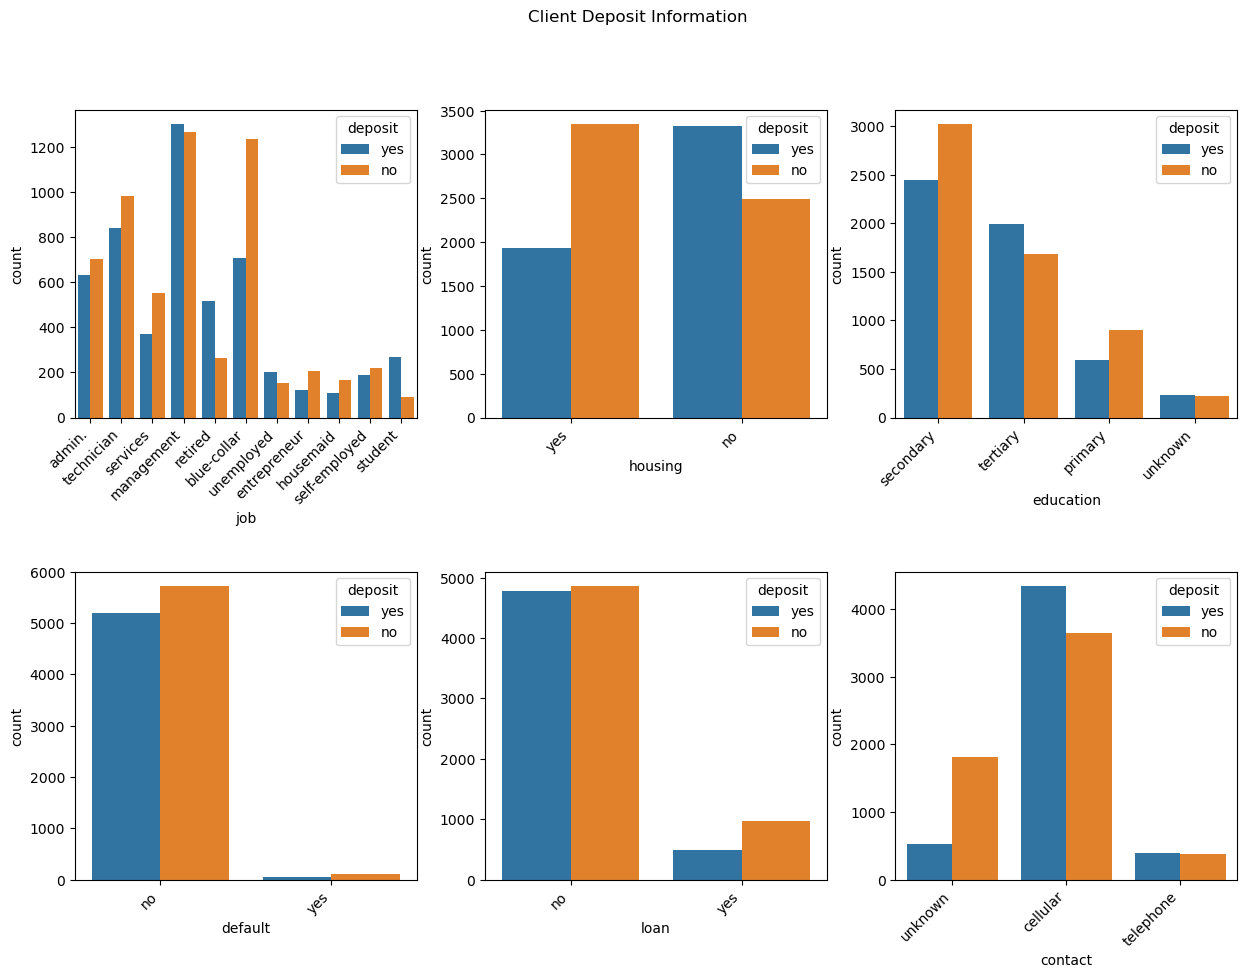

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Client Deposit Information')

fig1 = sns.countplot(ax=axes[0,0], data=df, x='job',  hue='deposit')
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=45, horizontalalignment='right')

fig2 = sns.countplot(ax=axes[0,1], data=df, x='housing', hue='deposit')
fig2.set_xticklabels(fig2.get_xticklabels(), rotation=45, horizontalalignment='right')

fig3 = sns.countplot(ax=axes[0,2], data=df, x='education', hue='deposit')
fig3.set_xticklabels(fig3.get_xticklabels(), rotation=45, horizontalalignment='right')

fig4 = sns.countplot(ax=axes[1,0], data=df, x='default', hue='deposit')
fig4.set_xticklabels(fig4.get_xticklabels(), rotation=45, horizontalalignment='right')

fig5 = sns.countplot(ax=axes[1,1], data=df, x='loan', hue='deposit')
fig5.set_xticklabels(fig5.get_xticklabels(), rotation=45, horizontalalignment='right')

fig6 = sns.countplot(ax=axes[1,2], data=df, x='contact', hue='deposit')
fig6.set_xticklabels(fig6.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplots_adjust(hspace = 0.5)
# sns.set(font_scale=2.5)

### Insights from several categorical features/deposit:
- "Job": 
   Among different jobs, "management" is the title which shows highst number of 'deposits = yes'.
  'housemaids' also have the lowest amount of 'deposit=yes'. Only people who are not earning musch money, and not feeling 
  financially secure, deposit their money.
- "Housing":
   Among the clients, the ones with no housing have deposited more as compared with the ones who own a house. Maybe mortgage   payment prevents them from saving money or maybe they don't have a mortgage and no need to worry about investing on their money.
   In reverse, great number of clients with no housing have depositted money. 
- "Edcation":
   Most number of deposits belong to the group with secondary education. However, among secondary education clints, number of not-deposit is higher than deposit. 
   Among clients of post-secondary education (Teritary education), larger number have depositted.
   Majority of clients have secendary education leve(high-school) and lowest number of clients have primary education
- "Default":
   Most clients have no defaults in their accounts. Among them, a little larger people have not subscribed to term depoist. 
- "Loan":
   Most clients have no loans. Among them, relatively equal numbers have subscribed to the term deposit.
   Majority of clients have no loan. 
   Among those with loan, larger ratio have no deposit. Having loan has prevented them from depositing their money.
   Among those with no loan, almost same numbers have deposited and not depositted. 
- "Contact":
   It turns out that cellular is the most frequnetly method of contacting the clients. as compared with no deposite group, those who had been contacted using cllular have the higher subscription to the term deposit.   
 

## Numerical Data Correlation

In [80]:
df_corr = df.iloc[:, [0,5,9,11, 12, 13, 14, 16]]
df_corr['deposit'] = df_corr.deposit.map({'no':0, 'yes':1}).astype('uint8')
df_corr.head()

C:\Users\Hamid.Azizi\AppData\Local\Temp\1\ipykernel_4448\1772158791.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,balance,day,duration,campaign,pdays,previous,deposit
0,59,2343,5,1042,1,-1,0,1
1,56,45,5,1467,1,-1,0,1
2,41,1270,5,1389,1,-1,0,1
3,55,2476,5,579,1,-1,0,1
4,54,184,5,673,2,-1,0,1


<Axes: >

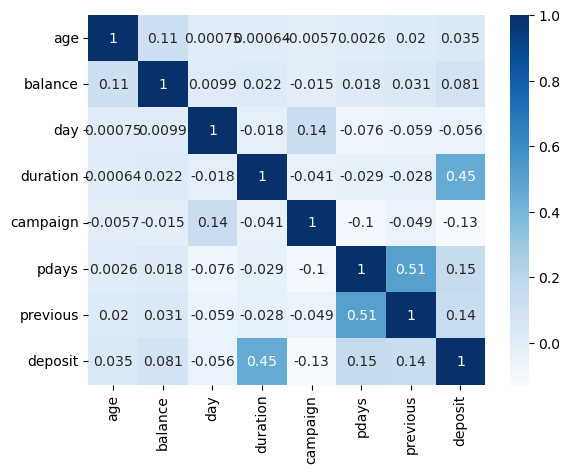

In [81]:
sns.heatmap(df_corr.corr(), annot=True, cmap="Blues")

### Insight from Heat-Map plot
- There is positive correlation between duration & deposite, pdays&deposit, and previous&deposit features. 
- Duration (of call in the last contact with customers) feature is the variable with the most correlation with target feature that is deposit. The higher the duration calls, the higher is  the chance of clients' subscription to the term deposit.
- Previous (number of contacts before the current campaign) also has a positive correlation with the number of clients subscribed to the term deposit.
- Campaign which is the number of contacts in the current campaign also positively correlates with the term deposit. 

## Some Feature Analysis

In [37]:
fig = px.box(df, x="job", y="duration", color="deposit")
fig.show()

### Insights
- The clinets with no deposits are the ones who have received less duration on calls.

### Campaign (number of contacts during this campaign) vs. Deposit 

In [38]:
# campaign: number of contacts performed during this campaign and for this client (numeric,includes last contact)
# duration: last call duration during the current campaig

fig = px.scatter(df, x="campaign", y='duration', color="deposit")
fig.show()

### Insights

- With increasing the duration call, there is a higher probability that clients subscribe to term deposit.  
- With increasing the number of contacts performed during this campaign, the duration of calls decreases and also less numbers of customers agree to theterm deposit.    
- with lower number of contacts, higher duration calls are required to deposit. Increasing the nuber of contacts with clients lowers the duration required to get clients to deposit.

In [39]:
# "month" : last contact month of year for the current campaign
fig = px.histogram(df, x="month", color='deposit', barmode='group', nbins=20)
fig.update_xaxes(title_text="Last Contact Month of Year")
fig.update_yaxes(title_text="Number of deposits")
fig.show()

### Insights:
- Most number of clients were contacted in the months of May, June, July and August. The highest number of deposit is observed in the month of May. 
- Very few of the clients were contacted during the months of Dec, March, October and September. The ratio of yes to depoits to no-deposits are higher amng the clients contacted during these months. So, it is recommended that the clients to be contacted during thses months. 

In [85]:
fig = px.histogram(df, color="deposit", x='pdays',  barmode='group', nbins=5)
fig.show()

### Insights:

- pdays is number of days that passed by after the client was last contacted from a previous campaign. Negative values mean that most of the clients have not been contacted previously.
- Majority of the clients were not contacted previously. Among them, lower ratio have subscribed to term deposite as compared to not deposit.  
- pdays above 200 result in less deposits. Less apart marketting campaigns with respect to time results in greater number of clients subscribing to the term deposit.  

In [41]:
# previous: number of contacts performed before this campaign and for this client (numeric)
# campaign: number of contacts performed during this campaign 
fig = px.scatter(df, x="campaign", y='previous', color="deposit")
fig.show()

### Insights:
- Higher previous number of contacts previously requires less campaign(less number of contacts currently) and provides better results in terms of motivating clients to subscribe for deposite term.
- Clients with zero contact in the previous campaigns, have zero subscription to the term deposit.  


In [42]:
fig = px.histogram(df, x="poutcome", color='deposit',   barmode='group')
fig.show()

### Insights:
- Great number of successfull previous campaigns have subscribed to deposit term. 
- Almost half of the previously failed campaigns, have deposited in the current campaign.
- We have large amount of data with unknown previous campaign.

## Jon and deposite Analysis

In [44]:
df_y = df[df['deposit'] == 'yes']
df_n = df[df['deposit'] == 'no']

df_job_deposit_n = df_n.groupby('job')['deposit'].count().reset_index()
df_job_deposit_n.rename(columns={"deposit": "No_deposit"}, inplace=True)
df_job_deposit_n.drop(columns='job', inplace=True)

df_job_deposit_y = df_y.groupby('job')['deposit'].count().reset_index()
df_job_deposit_y.rename(columns={"deposit": "Yes_deposit"}, inplace=True)
df_job_deposit_y

df_job_deposit = df.groupby('job')['deposit'].count().reset_index()
df_job_deposit['Total_deposit'] = df_job_deposit['deposit']
df_job_deposit = df_job_deposit.drop(columns=['deposit', 'job'])
df_job_deposit

df_new = pd.concat([df_job_deposit_y, df_job_deposit_n, df_job_deposit], axis=1)
df_new['yest_to_total_deposite_ratio'] = df_new['Yes_deposit'].div(df_new['Total_deposit'], axis=0)
df_new['no_to_total_deposite_ratio'] = df_new['No_deposit'].div(df_new['Total_deposit'], axis=0)

df_new


,job,Yes_deposit,No_deposit,Total_deposit,yest_to_total_deposite_ratio,no_to_total_deposite_ratio
0,admin.,631,703,1334,0.473013,0.526987
1,blue-collar,708,1236,1944,0.364198,0.635802
2,entrepreneur,123,205,328,0.375000,0.625000
3,housemaid,109,165,274,0.397810,0.602190
4,management,1301,1265,2566,0.507015,0.492985
5,retired,516,262,778,0.663239,0.336761
6,self-employed,187,218,405,0.461728,0.538272
7,services,369,554,923,0.399783,0.600217
8,student,269,91,360,0.747222,0.252778
9,technician,840,983,1823,0.460779,0.539221


### Insights from df_new dataframe
- If we ignore the size of different jobs among the bank clients, we can divide the ratio of clients with yes deposits to the total number of deposits in each job title.
- As we can see, the highest ratio of subscription to deposits come from students, retired, unemployed which are the minorities  among the bank clients. Among the majorities of the job titles of clients, we see the highest ratio goes for management, admin  and self-employed clients. 
- Among different jobs, "retired", "unemployed" and "students" have the higher ratio of (deposite=yes)/(deposit=no)compared to other jobs.

# Conclusions and Recommendations

1. Cellular is the best method of contactig with individuals.
2. Increasing the call duration with clients gives the bank higher probability to be the winner and persuades more clients to subscribe to the term deposit. 
3. Previous contact with the clients before the current campaign provides babk with higher chance of convinsing the clients to agree with the term deposit. 
4. With respect to last month contact with clients, the months of September, October and December are laos better to be considered as they show promising number of deposits to non deposits. 
5. Outcomes of the previous campaigns are also proving that there is high chance of the customers who subscribed previously, to do so in the future campaigns.  
6. To have an effective marketting results, loyal clients should be recognized and receive some bonuses and unique offers. Results prove that loyal clients are more likely to return for subscribinging the term deposit. 
7. Investigating the job related deposits, it is shown that students and retired clients respond better to marketting campaigns.

# Future Work
- Modelling and prediction of campaign results using various machine learning prediction methods
- Working on outliers in the data